# Adding Dependences

In [13]:
using DelimitedFiles
using Images, FileIO
using Plots

# Extract Matrix From Image

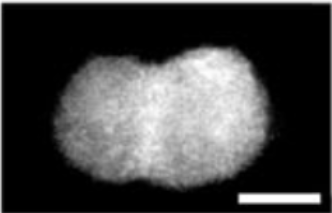

In [14]:
img = load("2.png")

## Extracting the grayscale on the image

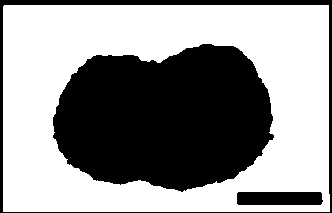

In [15]:
Gray_img = .! (Gray.(img) .> 0.1)
Gray.(Gray_img)

# Extracting the Contour on the image

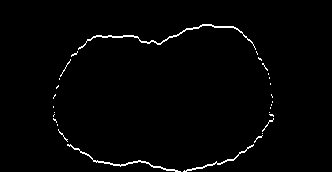

In [16]:
reduce = 21
Gray_img_contour = abs.(Gray_img - circshift(Gray_img,2))
Gray_img_contour = Gray_img_contour[reduce:size(Gray_img_contour)[1]-reduce,:]
Gray.(Gray_img_contour)

# Extracting the index of each point

In [17]:
idx = CartesianIndices(size(Gray_img_contour))[Gray_img_contour .== 1]
arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

899×2 Matrix{Int64}:
  54   98
  54   99
  54  107
  54  108
  54  116
  54  117
  54  119
  54  120
  55   96
  55   97
  55  113
  55  115
  55  120
   ⋮  
 273   97
 273   98
 273  102
 273  103
 273  115
 273  116
 273  121
 273  122
 274  116
 274  117
 274  119
 274  120

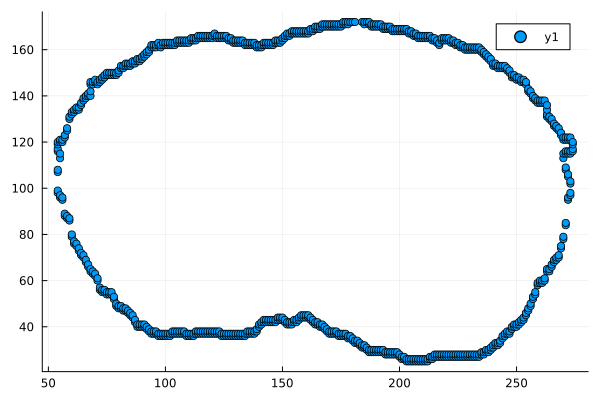

In [18]:
plot(arr_idx[:,1], arr_idx[:,2], seriestype = :scatter)

# Center of Mass

In [19]:
Gray_img

213×332 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  0  0  0
 0  0  0  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  0  0  0
 0  0  0  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  0  0  0
 0  0  0  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  0  0  0
 0  0  0  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  0  0  0
 0  0  0  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  0  0  0
 0  0  0  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  0  0  0
 0  0  0  1  1  1  1  1  1  1  1  1  1     1 

In [20]:
# In X
sum_x = sum(Gray_img, dims=1) .* collect(1:size(Gray_img,2))'
x_c = sum(sum_x) / sum(Gray_img)

# In Y
sum_y = sum(Gray_img, dims=2) .* collect(1:size(Gray_img,1))
y_c = sum(sum_y) / sum(Gray_img)

center_of_mass = hcat(x_c,y_c)

1×2 Matrix{Float64}:
 164.032  100.667

# Putting the index in the center of mass

In [21]:
center_idx = arr_idx - repeat(center_of_mass, size(arr_idx, 1))

899×2 Matrix{Float64}:
 -110.032  -2.66663
 -110.032  -1.66663
 -110.032   6.33337
 -110.032   7.33337
 -110.032  15.3334
 -110.032  16.3334
 -110.032  18.3334
 -110.032  19.3334
 -109.032  -4.66663
 -109.032  -3.66663
 -109.032  12.3334
 -109.032  14.3334
 -109.032  19.3334
    ⋮      
  108.968  -3.66663
  108.968  -2.66663
  108.968   1.33337
  108.968   2.33337
  108.968  14.3334
  108.968  15.3334
  108.968  20.3334
  108.968  21.3334
  109.968  15.3334
  109.968  16.3334
  109.968  18.3334
  109.968  19.3334

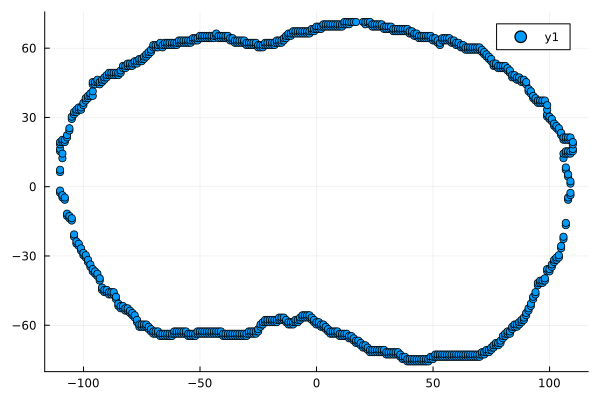

In [22]:
plot(center_idx[:,1], center_idx[:,2], seriestype = :scatter)

## Cilindrical Coordinates

In [23]:
r = sqrt.(sum(center_idx .^ 2, dims=2))
θ = atan.(center_idx[:,2] ./ center_idx[:,1]) + pi*[center_idx[:,2] .< 0][1]
center_idx_cil_coord = hcat(θ,r)

899×2 Matrix{Float64}:
  3.16582    110.064
  3.15674    110.045
 -0.0574959  110.214
 -0.0665492  110.276
 -0.138462   111.095
 -0.147366   111.238
 -0.165102   111.549
 -0.173931   111.718
  3.18437    109.132
  3.17521    109.094
 -0.112638   109.727
 -0.130711   109.97
 -0.175494   110.733
  ⋮          
  3.10796    109.03
  3.11713    109.001
  0.0122358  108.976
  0.0214101  108.993
  0.130787   109.907
  0.139797   110.041
  0.184478   110.849
  0.193331   111.037
  0.138542   111.032
  0.147451   111.174
  0.165196   111.486
  0.174031   111.655

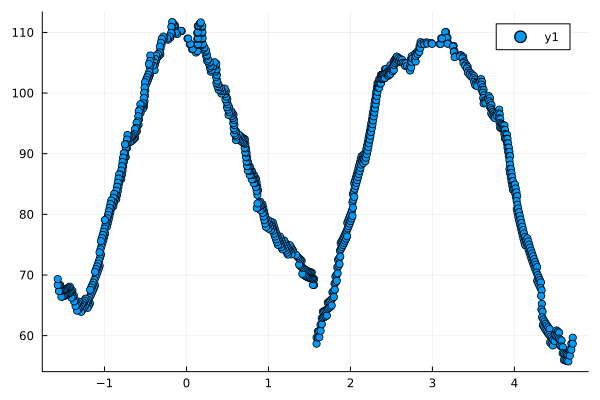

In [24]:
plot(center_idx_cil_coord[:,1], center_idx_cil_coord[:,2], seriestype = :scatter)